In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import matplotlib.pyplot as plt 
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, cv, Pool
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from lightgbm import LGBMClassifier

from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from google.colab import files
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

***read train and test dataset***

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/playground/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/playground/test.csv")

**check data state**

In [ ]:
cols_with_missing = [col for col in train.columns if train[col].isnull().any()]
print(cols_with_missing)
cols_with_missing = [col for col in test.columns if test[col].isnull().any()]
print(cols_with_missing)

[]
[]


train and test have no missing value

In [ ]:
s = (train.dtypes == 'object')
object_cols = list(s[s].index)

s_ = (test.dtypes == 'object')
object_cols_ = list(s[s].index)

print("train Categorical variables:")
print(object_cols)
print("test Categorical variables:")
print(object_cols_)

train Categorical variables:
[]
test Categorical variables:
[]


train and test have integer only

In [ ]:
print(train.shape,test.shape)

for r in range(7):
    ct = (train['Cover_Type'] == r+1) 
    print('Cover_Type=',str(r+1),' is :',ct.sum())

(4000000, 56) (1000000, 55)
Cover_Type= 1  is : 1468136
Cover_Type= 2  is : 2262087
Cover_Type= 3  is : 195712
Cover_Type= 4  is : 377
Cover_Type= 5  is : 1
Cover_Type= 6  is : 11426
Cover_Type= 7  is : 62261


There is only one observation of Cover_Type='5', so I will drop it

**drop record Cover_Type='5'**

In [ ]:
train.drop(train.index[train['Cover_Type'] == 5],inplace = True)
print(train.shape)

(3999999, 56)


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,3999999.0,1.999999e+06,1.154701e+06,0.0,999999.5,1999999.0,2999998.5,3999999.0
Elevation,3999999.0,2.980192e+03,2.890482e+02,1773.0,2760.0,2966.0,3217.0,4383.0
Aspect,3999999.0,1.515857e+02,1.099611e+02,-33.0,60.0,123.0,247.0,407.0
Slope,3999999.0,1.509753e+01,8.546724e+00,-3.0,9.0,14.0,20.0,64.0
Horizontal_Distance_To_Hydrology,3999999.0,2.713155e+02,2.265497e+02,-92.0,110.0,213.0,361.0,1602.0
Vertical_Distance_To_Hydrology,3999999.0,5.166261e+01,6.821597e+01,-317.0,4.0,31.0,78.0,647.0
Horizontal_Distance_To_Roadways,3999999.0,1.766642e+03,1.315610e+03,-287.0,822.0,1436.0,2365.0,7666.0
Hillshade_9am,3999999.0,2.118375e+02,3.075996e+01,-4.0,198.0,218.0,233.0,301.0
Hillshade_Noon,3999999.0,2.210614e+02,2.223134e+01,49.0,210.0,224.0,237.0,279.0
Hillshade_3pm,3999999.0,1.408109e+02,4.369864e+01,-53.0,115.0,142.0,169.0,272.0


In [ ]:
train[train.Horizontal_Distance_To_Hydrology<0].shape[0]

2959

In [ ]:
train[train.Vertical_Distance_To_Hydrology<0].shape[0]

567497

In [ ]:
train[train.Horizontal_Distance_To_Roadways<0].shape[0]

30726

In [ ]:
train[train.Horizontal_Distance_To_Fire_Points<0].shape[0]

25717

i will drop colums 'Soil_Type7' and 'Soil_Type15' because they have only '0'

In [ ]:
train.drop(['Soil_Type7','Soil_Type15'],axis = 1,inplace = True)
test.drop(['Soil_Type7','Soil_Type15'],axis = 1,inplace = True)
print(train.shape,test.shape)

(3999999, 54) (1000000, 53)


Test Multi-collinearity

In [ ]:
vif_X=train.drop(['Id','Cover_Type'],axis = 1)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = vif_X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_X.values, i)
                          for i in range(len(vif_X.columns))]

In [ ]:
vif_data

,feature,VIF
0,Elevation,76.735547
1,Aspect,2.897346
2,Slope,4.095981
3,Horizontal_Distance_To_Hydrology,2.433372
4,Vertical_Distance_To_Hydrology,1.576142
5,Horizontal_Distance_To_Roadways,2.915287
6,Hillshade_9am,40.829074
7,Hillshade_Noon,68.627716
8,Hillshade_3pm,11.100936
9,Horizontal_Distance_To_Fire_Points,3.047927


In [ ]:
train["Horizontal_Direction_To_Hydrology"]=np.sign(train["Horizontal_Distance_To_Hydrology"])
train["Horizontal_Distance_To_Hydrology"]=np.abs(train["Horizontal_Distance_To_Hydrology"])

train["Vertical_Direction_To_Hydrology"]=np.sign(train["Vertical_Distance_To_Hydrology"])
train["Vertical_Distance_To_Hydrology"]=np.abs(train["Vertical_Distance_To_Hydrology"])

train["Distance_To_Hydrology"]=np.sqrt(train["Vertical_Distance_To_Hydrology"]**2+train["Horizontal_Distance_To_Hydrology"]**2)

train["Horizontal_Direction_To_Roadways"]=np.sign(train["Horizontal_Distance_To_Roadways"])
train["Horizontal_Distance_To_Roadways"]=np.abs(train["Horizontal_Distance_To_Roadways"])

train["Horizontal_Direction_To_Fire_Points"]=np.sign(train["Horizontal_Distance_To_Fire_Points"])
train["Horizontal_Distance_To_Fire_Points"]=np.abs(train["Horizontal_Distance_To_Fire_Points"])

In [ ]:
test["Horizontal_Direction_To_Hydrology"]=np.sign(test["Horizontal_Distance_To_Hydrology"])
test["Horizontal_Distance_To_Hydrology"]=np.abs(test["Horizontal_Distance_To_Hydrology"])

test["Vertical_Direction_To_Hydrology"]=np.sign(test["Vertical_Distance_To_Hydrology"])
test["Vertical_Distance_To_Hydrology"]=np.abs(test["Vertical_Distance_To_Hydrology"])

test["Distance_To_Hydrology"]=np.sqrt(test["Vertical_Distance_To_Hydrology"]**2+test["Horizontal_Distance_To_Hydrology"]**2)

test["Horizontal_Direction_To_Roadways"]=np.sign(test["Horizontal_Distance_To_Roadways"])
test["Horizontal_Distance_To_Roadways"]=np.abs(test["Horizontal_Distance_To_Roadways"])

test["Horizontal_Direction_To_Fire_Points"]=np.sign(test["Horizontal_Distance_To_Fire_Points"])
test["Horizontal_Distance_To_Fire_Points"]=np.abs(test["Horizontal_Distance_To_Fire_Points"])

In [ ]:
continuous_variable = [ 'Elevation','Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology','Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways','Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
categorical_colums0=['Horizontal_Direction_To_Hydrology','Vertical_Direction_To_Hydrology','Horizontal_Direction_To_Roadways','Horizontal_Direction_To_Fire_Points']
categorical_colums1 = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3','Wilderness_Area4'] 
categorical_colums2 = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6',  'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14',  'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
categorical_colums = categorical_colums0+categorical_colums1+categorical_colums2

Normalize continuous variables

In [ ]:
def feature_normalization(feature):
  return (feature-min(feature))/(max(feature)-min(feature))

In [ ]:
train["Elevation"]=feature_normalization(train["Elevation"])
train["Aspect"]=feature_normalization(train["Aspect"])
train["Slope"]=feature_normalization(train["Slope"])
train["Horizontal_Distance_To_Hydrology"]=feature_normalization(train["Horizontal_Distance_To_Hydrology"])
train["Vertical_Distance_To_Hydrology"]=feature_normalization(train["Vertical_Distance_To_Hydrology"])
train["Horizontal_Distance_To_Roadways"]=feature_normalization(train["Horizontal_Distance_To_Roadways"])
train["Distance_To_Hydrology"]=feature_normalization(train["Distance_To_Hydrology"])
train["Hillshade_9am"]=feature_normalization(train["Hillshade_9am"])
train["Hillshade_Noon"]=feature_normalization(train["Hillshade_Noon"])
train["Hillshade_3pm"]=feature_normalization(train["Hillshade_3pm"])
train["Horizontal_Distance_To_Fire_Points"]=feature_normalization(train["Horizontal_Distance_To_Fire_Points"])

In [ ]:
test["Elevation"]=feature_normalization(test["Elevation"])
test["Aspect"]=feature_normalization(test["Aspect"])
test["Slope"]=feature_normalization(test["Slope"])
test["Horizontal_Distance_To_Hydrology"]=feature_normalization(test["Horizontal_Distance_To_Hydrology"])
test["Vertical_Distance_To_Hydrology"]=feature_normalization(test["Vertical_Distance_To_Hydrology"])
test["Horizontal_Distance_To_Roadways"]=feature_normalization(test["Horizontal_Distance_To_Roadways"])
test["Distance_To_Hydrology"]=feature_normalization(test["Distance_To_Hydrology"])
test["Hillshade_9am"]=feature_normalization(test["Hillshade_9am"])
test["Hillshade_Noon"]=feature_normalization(test["Hillshade_Noon"])
test["Hillshade_3pm"]=feature_normalization(test["Hillshade_3pm"])
test["Horizontal_Distance_To_Fire_Points"]=feature_normalization(test["Horizontal_Distance_To_Fire_Points"])

In [ ]:
train["sum_c1"] = train[categorical_colums1].sum(axis=1)
train["sum_c2"] = train[categorical_colums2].sum(axis=1)

test["sum_c1"] = test[categorical_colums1].sum(axis=1)
test["sum_c2"] = test[categorical_colums2].sum(axis=1)

Create some summary features to see if this works better in the model

In [ ]:
def checkerrorcount(model):
    predict_classifier = model.predict(X_valid)
    y_reshape=np.ravel(y_valid)
    c = 0
    e = 0

    for r in range(y_reshape.size):
        if y_reshape[r]==predict_classifier[r]:
            c = c + 1
        if y_reshape[r]!=predict_classifier[r]:
            e = e + 1
    return f'correct count is: {c} ,error count is: {e}'

**check features in train , each Cover_Type but exclude Cover_Type=5**

**prepare training data**

In [ ]:
X=train.drop(['Id','Cover_Type'],axis = 1)
y = train.Cover_Type

#Separate data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=14)

Baseline model with Random Forest

**create model with using XGBClassifier**

Our data set here is not very unbalanced, which means mlogloss is fine.

In [ ]:
XGB_classifier = XGBClassifier(objective='multi:softmax',eval_metric = 'mlogloss',tree_method='gpu_hist')
XGB_classifier.fit(X_train, X_train)
print(checkerrorcount(XGB_classifier))

correct count is: 748268 ,error count is: 51732


In [ ]:
CatBoost_classifier=CatBoostClassifier()
CatBoost_classifier = CatBoostClassifier(task_type="GPU",use_best_model = True, random_seed = 14,eval_metric='MultiClass',iterations=3000)
CatBoost_classifier.fit(X_train, y_train, eval_set= (X_valid, y_valid), early_stopping_rounds=100,verbose = False)
print(checkerrorcount(CatBoost_classifier))

Custom logger is already specified. Specify more than one logger at same time is not thread safe.Warning: less than 75% gpu memory available for training. Free: 5007.75 Total: 16280.875


correct count is: 769070 ,error count is: 30930


In [ ]:
test_target = test.drop(['Id'],axis = 1)
int_predict = np.ravel(CatBoost_classifier.predict(test_target))
output_CatBoost = pd.DataFrame({'Id': test.Id, 'Cover_Type': int_predict})
output_CatBoost.to_csv('submission_CatBoost.csv', index=False)

In [ ]:
files.download("submission_CatBoost.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
lightGBM_classifier=LGBMClassifier(objective='multi:softmax',eval_metric = 'mlogloss',tree_learner="data")
lightGBM_classifier.fit(X_train, y_train)
print(checkerrorcount(lightGBM_classifier))

correct count is: 763227 ,error count is: 36773


In [ ]:
test_target = test.drop(['Id'],axis = 1)
int_predict = np.ravel(lightGBM_classifier.predict(test_target))
output_lightGBM = pd.DataFrame({'Id': test.Id, 'Cover_Type': int_predict})
output_lightGBM.to_csv('submission_lightGBM.csv', index=False)

In [ ]:
files.download("submission_lightGBM.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

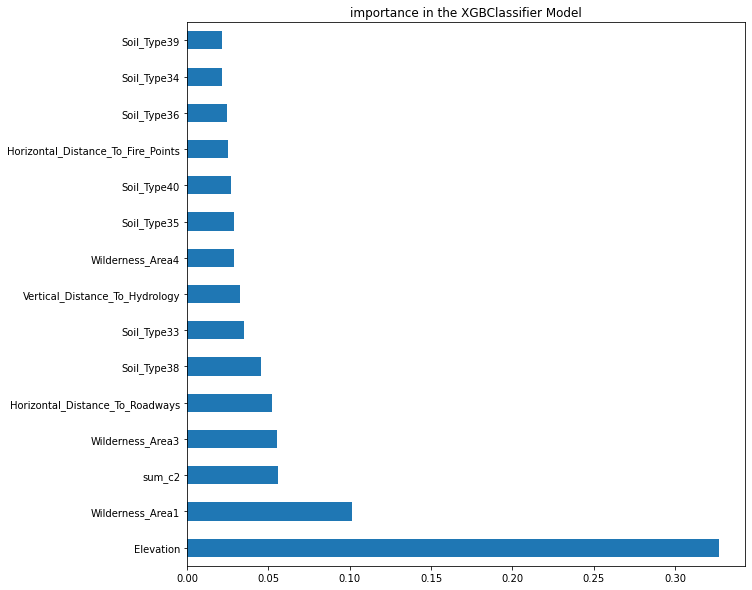

In [ ]:
plt.figure(figsize=(10,20))

importances = pd.Series(XGB_classifier.feature_importances_, index = X.columns)
importances = importances.sort_values()
importances.nlargest(15).plot(kind = "barh",figsize=(10,10))
plt.title("importance in the XGBClassifier Model")

plt.show()

### Hyperparameter tuning

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0,0.5, 1, 1.5, 3],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3,4,5]
        }

In [ ]:
xgb = XGBClassifier(objective='multi:softmax',eval_metric = 'mlogloss',tree_method='gpu_hist',silent=True)


In [ ]:
param_comb = 50

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='f1_macro', verbose=3, random_state=1001 )

# Here we go

random_search.fit(X, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END colsample_bytree=0.6, gamma=2, learn_rate=0.01, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.641 total time=  55.8s
[CV 2/5] END colsample_bytree=0.6, gamma=2, learn_rate=0.01, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.664 total time=  55.2s
[CV 3/5] END colsample_bytree=0.6, gamma=2, learn_rate=0.01, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.663 total time=  54.7s
[CV 4/5] END colsample_bytree=0.6, gamma=2, learn_rate=0.01, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.674 total time=  54.5s
[CV 5/5] END colsample_bytree=0.6, gamma=2, learn_rate=0.01, max_depth=4, min_child_weight=5, subsample=0.8;, score=0.662 total time=  54.9s
[CV 1/5] END colsample_bytree=0.6, gamma=2, learn_rate=0.01, max_depth=4, min_child_weight=5, subsample=1.0;, score=0.629 total time=  54.2s
[CV 2/5] END colsample_bytree=0.6, gamma=2, learn_rate=0.01, max_depth=4, min_child_weight=5

RandomizedSearchCV(estimator=XGBClassifier(eval_metric='mlogloss',
                                           objective='multi:softmax',
                                           silent=True,
                                           tree_method='gpu_hist'),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learn_rate': [0.01, 0.03],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='f1_macro', verbose=3)

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score with %d parameter combinations:' % (param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 All results:
{'mean_fit_time': array([54.01722579, 52.91280184, 55.22846713, 50.2399395 , 49.60846395,
       55.01144023, 56.06003952, 48.72505145, 54.60930862, 53.62847729,
       54.93560653, 51.81377888, 52.2423316 , 49.63665185, 55.59107499,
       56.18808041, 54.70843468, 51.93563933, 50.92743959, 54.84779429,
       54.04717011, 48.92247887, 52.02578907, 49.21325541, 54.4573627 ,
       48.7551456 , 55.19917502, 56.15534315, 52.18807673, 49.278652  ,
       49.04596181, 49.89478936, 49.45066733, 56.82859526, 51.15897913,
       52.71370463, 49.65837445, 53.68204927, 50.48693309, 51.95480804,
       49.22450209, 54.88355298, 55.0068469 , 48.88052506, 52.16602349,
       49.27728934, 52.2381959 , 50.1908895 , 54.38088388, 49.61179967]), 'std_fit_time': array([0.47049542, 0.29837574, 0.32275255, 0.18295745, 0.21141496,
       0.34142575, 0.4175091 , 0.22638048, 0.29691312, 0.24881793,
       0.31643005, 0.31250715, 0.19592199, 0.20003564, 0.52669873,
       0.20028762, 0.3300313

In [ ]:
best_xgb=XGBClassifier(colsample_bytree=0.8, eval_metric='mlogloss', gamma=1.5,
              max_depth=5, objective='multi:softprob', silent=True,
              subsample=0.6, tree_method='gpu_hist')
best_xgb.fit(X_train, y_train)
print(checkerrorcount(best_xgb))

correct count is: 760335 ,error count is: 39665


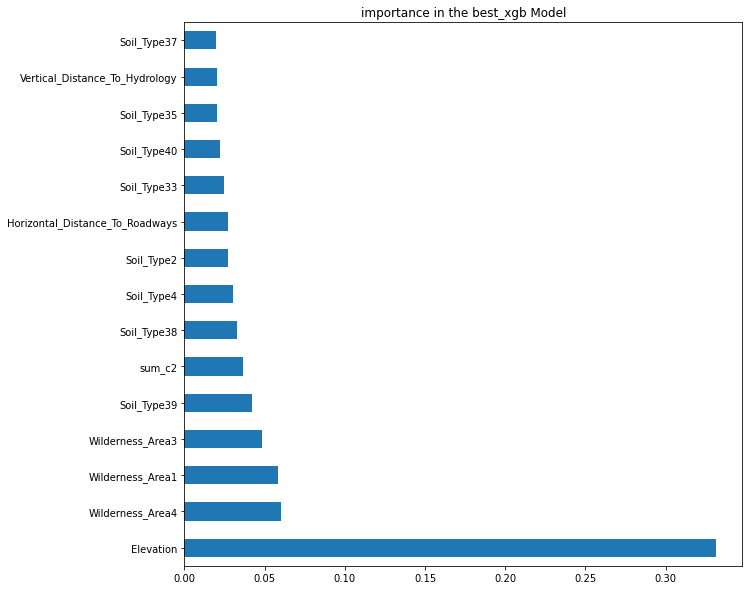

In [ ]:
plt.figure(figsize=(10,20))

importances = pd.Series(best_xgb.feature_importances_, index = X.columns)
importances = importances.sort_values()
importances.nlargest(15).plot(kind = "barh",figsize=(10,10))
plt.title("importance in the best_xgb Model")

plt.show()

In [ ]:
xgb_1=XGBClassifier(colsample_bytree=0.8, eval_metric='mlogloss', gamma=0,
              max_depth=5, objective='multi:softprob', silent=True,
              subsample=0.6, tree_method='gpu_hist')
xgb_1.fit(X_train, y_train)
print(checkerrorcount(xgb_1))

correct count is: 760491 ,error count is: 39509


In [ ]:
test_target = test.drop(['Id'],axis = 1)
int_predict = np.ravel(best_xgb.predict(test_target))
output_best_xgb = pd.DataFrame({'Id': test.Id, 'Cover_Type': int_predict})
output_best_xgb.to_csv('submission_best_xgb.csv', index=False)

In [ ]:
from google.colab import files
files.download("submission_best_xgb.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>